In [3]:
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns;
sns.set_style('whitegrid')

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

## Decision Tree

In [16]:
%%HTML
<h2>1.Classification</h2>

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size = .8, test_size = .2, random_state = 6)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_pred, y_test)

0.9333333333333333

Text(92.68, 0.5, 'Prdict Label')

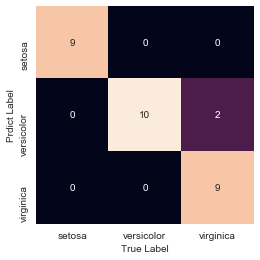

In [9]:
matrix = confusion_matrix(y_test, y_pred)
names = iris.target_names
sns.heatmap(matrix.T, annot = True, square = True, cbar = False, xticklabels = names, yticklabels = names)
plt.xlabel('True Label')
plt.ylabel('Prdict Label')

In [10]:
report = classification_report(y_test, y_pred, target_names = names)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [18]:
%%HTML
<h2>Regession</h3>

Generate data

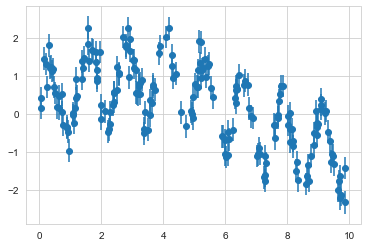

In [19]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o');

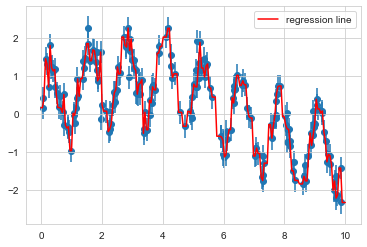

In [27]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
X = x.reshape((-1,1))
model.fit(X, y)
plt.errorbar(x, y, .3, fmt = 'o', zorder = 0)
X = np.linspace(0, 10, 200)
plt.plot(X, model.predict(X[:, np.newaxis]), label = 'regression line', color = 'red', zorder = 1)
plt.legend()

## Random Forest

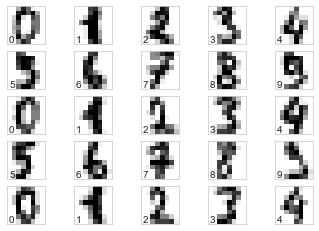

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(5,5,subplot_kw = {'xticks':[], 'yticks' : []}, gridspec_kw = {'hspace' : .2, 'wspace' :0})
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = 'binary', interpolation = 'nearest')
    ax.text(.05, .05, str(digits.target[i]), transform = ax.transAxes)

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size = .8, test_size = .2, random_state = 101)
model = RandomForestClassifier(n_estimators=1000)
%timeit model.fit(x_train, y_train)
y_pred = model.predict(x_test)


1.96 s ± 36.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_pred, y_test)

0.9805555555555555

Text(92.68, 0.5, 'True label')

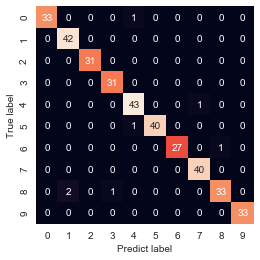

In [32]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot = True, square = True, cbar = False)
plt.xlabel('Predict label')
plt.ylabel('True label')

In [35]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        31
           3       0.97      1.00      0.98        31
           4       0.96      0.98      0.97        44
           5       1.00      0.98      0.99        41
           6       1.00      0.96      0.98        28
           7       0.98      1.00      0.99        40
           8       0.97      0.92      0.94        36
           9       1.00      1.00      1.00        33

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

